In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score, precision_recall_curve, auc,f1_score


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report


# Load your dataset
df = pd.read_csv("fraud_reduced.csv", index_col=0)


In [3]:
X = df.drop("Class", axis=1)
y = df["Class"]

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.33, stratify=y)

In [6]:

param_grid = {
    'algorithm': ['auto'],
    'leaf_size': [30, 20, 10],
    'metric' : ['minkowski'],
    'n_neighbors': [5,4,7],
    'p' : [2,3,4],
    'weights': ["uniform"]
}

# Create the SVM classifier
rnd_clf = KNeighborsClassifier(n_jobs=-1)

scoring = {
    'roc_auc': make_scorer(roc_auc_score, needs_threshold=True),
    'f1_score' : make_scorer(f1_score)
}

# Create a GridSearchCV instance with cross-validation
grid_search = GridSearchCV(
    rnd_clf,
    param_grid=param_grid,  
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=None),  # Cross-validation strategy
    n_jobs=-1,  # Use all available CPU cores
    scoring=scoring,
    refit='f1_score',
    verbose=2,
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'algorithm': ['auto'], 'leaf_size': [30, 20, 10],
                         'metric': ['minkowski'], 'n_neighbors': [5, 4, 7],
                         'p': [2, 3, 4], 'weights': ['uniform']},
             refit='f1_score',
             scoring={'f1_score': make_scorer(f1_score),
                      'roc_auc': make_scorer(roc_auc_score, needs_threshold=True)},
             verbose=2)

In [7]:
grid_search.best_params_

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'n_neighbors': 7,
 'p': 3,
 'weights': 'uniform'}

In [8]:
grid_search.best_estimator_

KNeighborsClassifier(n_jobs=-1, n_neighbors=7, p=3)

In [9]:
grid_search.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 7,
 'p': 3,
 'weights': 'uniform'}

In [11]:
clf_knn = grid_search.best_estimator_

In [12]:
y_pred = clf_knn.predict(X_test)

[[93813    12]
 [   36   126]]


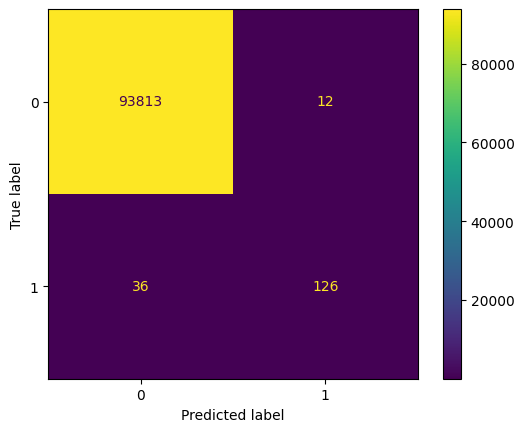

In [13]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_knn.classes_)
disp.plot()

In [14]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.91      0.78      0.84       162

    accuracy                           1.00     93987
   macro avg       0.96      0.89      0.92     93987
weighted avg       1.00      1.00      1.00     93987



In [15]:
import joblib

joblib.dump(value= clf_knn, filename='KNN.pkl')

['KNN.pkl']